In [16]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
import mediapipe as mp 

In [7]:
import os
# assign directory
directory = 'images/bigdata/mediapipe/classImages/'
csvs = {}

# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        csvs[filename] = pd.read_csv(f)
        

In [8]:
csvs

{'AF01_CC.jpg.mediapipe':          x0       y0       z0        x1        y1        z1        x2  \
 0  0.518293  0.76155 -0.07146  0.516839  0.674908 -0.127719  0.517262   
 
          y2        z2        x3  ...      z464     x465      y465      z465  \
 0  0.702086 -0.067379  0.493409  ...  0.004032  0.55095  0.537707 -0.012401   
 
        x466     y466      z466      x467      y467      z467  
 0  0.682057  0.51445  0.034153  0.694371  0.504882  0.035323  
 
 [1 rows x 1404 columns],
 'AF01_CO.jpg.mediapipe':          x0        y0        z0        x1        y1       z1        x2  \
 0  0.517538  0.728197 -0.068523  0.518217  0.647276 -0.12664  0.517578   
 
          y2        z2        x3  ...      z464      x465     y465      z465  \
 0  0.672956 -0.066127  0.496065  ...  0.000868  0.552935  0.51287 -0.015364   
 
        x466      y466      z466      x467      y467     z467  
 0  0.680598  0.491219  0.031275  0.692991  0.482316  0.03245  
 
 [1 rows x 1404 columns],
 'AF01_HC.jp

In [10]:
for key in csvs:
    if "_N" in key or "_C" in key:
        csvs[key]['state'] = 0
    if "_S" in key :
        csvs[key]['state'] = 2
    if "_H" in key :
        csvs[key]['state'] = 1
    

In [11]:
csvs['AF01_CC.jpg.mediapipe']

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x465,y465,z465,x466,y466,z466,x467,y467,z467,state
0,0.518293,0.76155,-0.07146,0.516839,0.674908,-0.127719,0.517262,0.702086,-0.067379,0.493409,...,0.55095,0.537707,-0.012401,0.682057,0.51445,0.034153,0.694371,0.504882,0.035323,0


In [12]:
stated_dfs = []
for key in csvs:
    stated_dfs.append(csvs[key])

In [13]:
all_df = pd.concat(stated_dfs)

In [14]:
all_df

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x465,y465,z465,x466,y466,z466,x467,y467,z467,state
0,0.518293,0.761550,-0.071460,0.516839,0.674908,-0.127719,0.517262,0.702086,-0.067379,0.493409,...,0.550950,0.537707,-0.012401,0.682057,0.514450,0.034153,0.694371,0.504882,0.035323,0
0,0.517538,0.728197,-0.068523,0.518217,0.647276,-0.126640,0.517578,0.672956,-0.066127,0.496065,...,0.552935,0.512870,-0.015364,0.680598,0.491219,0.031275,0.692991,0.482316,0.032450,0
0,0.534276,0.745018,-0.046351,0.539363,0.682246,-0.125470,0.535310,0.700266,-0.060469,0.514093,...,0.563826,0.538044,-0.031596,0.687982,0.511413,0.018237,0.699295,0.502123,0.019823,1
0,0.508416,0.723951,-0.050564,0.506815,0.662735,-0.128186,0.507522,0.680536,-0.064073,0.485832,...,0.542961,0.520366,-0.036428,0.669356,0.495931,0.001254,0.682214,0.485383,0.002078,1
0,0.503799,0.718928,-0.055036,0.502151,0.656668,-0.130877,0.502394,0.675649,-0.067291,0.480226,...,0.535284,0.517054,-0.032197,0.661046,0.491355,0.009005,0.673849,0.481918,0.010038,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.505780,0.685158,-0.046757,0.508667,0.618401,-0.117382,0.507005,0.637372,-0.058808,0.493291,...,0.543372,0.495822,-0.029614,0.655873,0.478469,0.010755,0.665876,0.474605,0.011270,1
0,0.485193,0.674081,-0.054789,0.486322,0.595392,-0.112561,0.486686,0.618973,-0.057156,0.471779,...,0.523774,0.480337,-0.019145,0.637950,0.462733,0.019116,0.647437,0.460089,0.019137,0
0,0.483937,0.691063,-0.056356,0.484890,0.611432,-0.114199,0.485104,0.635326,-0.058161,0.469513,...,0.522293,0.494142,-0.019356,0.637666,0.475454,0.018796,0.647382,0.472385,0.018768,0
0,0.484255,0.674057,-0.058391,0.477145,0.601132,-0.110868,0.480704,0.623609,-0.058903,0.457781,...,0.507800,0.479220,-0.012914,0.618864,0.456076,0.023014,0.628230,0.452202,0.022856,2


In [17]:
all_df['state'] = all_df['state'].astype('int')
y = np.asarray(all_df['state'])
y [0:5]

array([0, 0, 1, 1, 1])

In [18]:
just_x_df = all_df.drop('state', axis = 1)

In [19]:
just_x_df.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z464,x465,y465,z465,x466,y466,z466,x467,y467,z467
0,0.518293,0.761550,-0.071460,0.516839,0.674908,-0.127719,0.517262,0.702086,-0.067379,0.493409,...,0.004032,0.550950,0.537707,-0.012401,0.682057,0.514450,0.034153,0.694371,0.504882,0.035323
0,0.517538,0.728197,-0.068523,0.518217,0.647276,-0.126640,0.517578,0.672956,-0.066127,0.496065,...,0.000868,0.552935,0.512870,-0.015364,0.680598,0.491219,0.031275,0.692991,0.482316,0.032450
0,0.534276,0.745018,-0.046351,0.539363,0.682246,-0.125470,0.535310,0.700266,-0.060469,0.514093,...,-0.015983,0.563826,0.538044,-0.031596,0.687982,0.511413,0.018237,0.699295,0.502123,0.019823
0,0.508416,0.723951,-0.050564,0.506815,0.662735,-0.128186,0.507522,0.680536,-0.064073,0.485832,...,-0.021547,0.542961,0.520366,-0.036428,0.669356,0.495931,0.001254,0.682214,0.485383,0.002078
0,0.503799,0.718928,-0.055036,0.502151,0.656668,-0.130877,0.502394,0.675649,-0.067291,0.480226,...,-0.016613,0.535284,0.517054,-0.032197,0.661046,0.491355,0.009005,0.673849,0.481918,0.010038


In [20]:
X = np.asarray(just_x_df)
X[0:5]

array([[ 0.51829255,  0.76154977, -0.07146025, ...,  0.69437063,
         0.50488162,  0.03532292],
       [ 0.51753807,  0.7281971 , -0.06852299, ...,  0.69299084,
         0.4823164 ,  0.03244977],
       [ 0.53427613,  0.74501812, -0.04635062, ...,  0.69929534,
         0.50212276,  0.0198228 ],
       [ 0.50841582,  0.72395092, -0.05056363, ...,  0.68221438,
         0.48538321,  0.00207775],
       [ 0.5037986 ,  0.7189275 , -0.05503556, ...,  0.67384869,
         0.48191786,  0.01003826]])

In [21]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score # Accuracy metrics 
from sklearn.metrics import classification_report, confusion_matrix
import itertools


In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
from sklearn.model_selection import RepeatedKFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 
pipelines = {
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}
fit_models = {}

In [24]:
train = {}
train['pipeline'] = pipelines['gb']

In [25]:
for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    for algo, pipeline in train.items():
        model = pipeline.fit(X_train, y_train)
        fit_models[algo] = model

Train: [  0   1   2   3   4   5   6   7   8  11  12  15  16  17  18  19  20  21
  22  24  26  27  28  30  31  32  33  34  36  37  38  40  41  42  43  44
  45  47  48  49  50  51  52  53  54  56  57  58  59  60  61  63  64  65
  66  68  69  72  73  74  75  76  77  78  79  80  81  82  83  84  88  90
  91  92  94  95  96  98  99 100 101 102 103 104 106 109 110 111 113 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 133 134
 135 136 139 141 142 144 145 147 148 149 150 151 152 153 155 156 157 158
 160 161 162 163 165 166 167 168 169 170 171 173 175 176 177 180 181 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 203
 205 206 207 209 210 212 213 214 215 216 217 218 219 220 221 223 224 225
 226 227 228 229 231 232 233 234 235 236 239 240 242 243 244 245 246 247
 248 249 250 251 252 253 256 257 258 259 260 262 263 264 265 266 267 268
 269 270] Validation: [  9  10  13  14  23  25  29  35  39  46  55  62  67  70  71  85  86  87
  89  93  97 105 107 1

Train: [  0   1   5   6   7   9  11  12  13  15  16  17  18  19  20  21  22  24
  26  27  28  29  30  32  33  35  36  37  38  40  41  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  61  62  63  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  80  82  83  84  86  87
  92  93  94  95  96  97  98 100 101 102 103 104 105 107 108 109 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 133 135 136 137 138 139 140 141 142 144 145 146 148 149 151 152 153
 155 156 157 158 159 160 161 162 163 164 165 166 168 169 170 171 172 174
 175 176 177 178 179 180 181 182 183 184 186 187 188 190 191 193 194 196
 197 198 199 200 203 205 206 209 210 212 213 214 216 219 222 223 224 226
 227 229 231 232 233 234 235 236 237 238 239 240 241 242 243 244 246 247
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 270 272] Validation: [  2   3   4   8  10  14  23  25  31  34  39  42  60  79  81  85  88  89
  90  91  99 106 1

Train: [  0   1   2   3   5   6   8   9  10  11  12  13  16  17  18  19  20  21
  22  23  24  27  29  30  31  32  33  34  35  36  37  38  39  41  42  43
  44  45  46  47  48  49  50  51  52  53  55  56  57  58  59  60  61  62
  64  65  66  67  68  69  70  73  74  75  76  77  79  80  81  83  84  85
  87  88  90  91  92  93  95  96  97  98 101 102 104 105 110 111 113 114
 115 116 117 118 119 120 121 123 124 125 126 128 129 130 132 133 134 135
 137 139 140 141 142 144 145 146 148 149 150 151 152 153 154 155 156 157
 159 160 161 162 163 164 165 166 168 169 170 171 172 173 174 176 177 178
 179 181 182 183 184 185 186 187 188 189 190 193 194 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 215 216 217 218 222
 223 224 225 226 227 228 229 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 249 252 253 255 257 258 259 260 263 264 265 267 268
 269 271] Validation: [  4   7  14  15  25  26  28  40  54  63  71  72  78  82  86  89  94  99
 100 103 106 107 108 1

Train: [  0   1   2   3   5   6   7   8  11  12  13  15  16  17  19  20  21  22
  23  24  25  27  30  31  33  34  35  36  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  54  55  57  58  59  60  61  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  86
  87  88  89  90  93  95  96  97  98  99 101 102 104 105 107 108 109 110
 111 112 113 114 116 117 118 119 120 121 122 123 125 127 129 130 131 132
 135 137 138 139 141 142 146 147 148 149 150 151 152 153 155 156 157 158
 159 160 161 162 163 165 166 167 168 169 170 171 172 173 174 175 177 179
 180 181 182 184 185 186 187 188 189 190 191 192 193 194 196 197 198 199
 200 201 202 206 208 209 211 212 213 214 215 216 218 219 220 222 223 225
 226 227 228 229 232 233 234 235 236 237 238 239 241 242 243 244 245 246
 247 248 249 250 251 253 254 255 256 258 259 260 262 263 265 266 268 269
 270 271 272] Validation: [  4   9  10  14  18  26  28  29  32  37  53  56  62  63  85  91  92  94
 100 103 106 115 1

Train: [  0   1   2   3   4   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  21  25  26  27  28  29  30  31  32  33  35  37  38  39  40  41  42
  43  44  45  46  48  49  50  51  53  56  57  60  62  63  64  65  66  67
  68  69  70  71  72  74  75  76  77  78  79  82  83  85  86  88  89  90
  91  93  94  95  96  97  98  99 100 101 102 103 104 106 107 108 109 110
 111 112 113 116 117 119 120 123 124 125 126 127 128 130 131 133 134 135
 136 137 138 139 141 143 144 145 146 148 149 150 154 155 156 157 158 159
 160 161 162 163 165 167 168 169 170 171 172 173 175 177 180 181 182 183
 184 185 186 187 188 189 190 191 193 196 197 198 200 201 202 203 204 206
 207 208 209 210 211 212 213 214 216 217 218 219 220 221 222 224 226 227
 228 229 231 232 233 234 235 236 237 238 239 241 244 245 246 247 249 250
 251 252 253 254 255 257 258 259 260 261 262 263 264 265 266 268 269 270
 271 272] Validation: [  5  20  22  23  24  34  36  47  52  54  55  58  59  61  73  80  81  84
  87  92 105 114 115 1

Train: [  1   2   3   4   5   7   9  11  13  14  15  17  18  19  20  21  22  23
  25  26  27  28  30  31  32  33  34  35  36  37  38  39  40  41  43  44
  47  48  49  50  51  52  55  56  57  58  60  61  62  63  65  66  67  68
  69  70  71  73  74  76  77  78  79  80  81  82  83  84  85  86  88  89
  90  91  93  94  95  96  97  98  99 100 102 103 104 105 106 107 108 109
 110 111 112 113 114 116 117 118 119 120 121 123 125 126 128 130 131 132
 134 135 136 137 139 140 141 142 143 144 145 146 147 148 150 151 152 153
 155 156 157 158 159 160 163 164 165 167 169 170 171 172 173 174 175 176
 177 178 180 181 182 183 184 185 187 189 190 191 192 194 197 198 199 200
 201 203 205 207 208 211 212 213 214 215 216 217 218 219 220 221 223 224
 225 226 228 229 231 232 233 234 235 236 237 238 241 242 244 247 248 249
 250 251 252 253 254 256 258 260 261 262 263 264 265 266 267 268 269 270
 271 272] Validation: [  0   6   8  10  12  16  24  29  42  45  46  53  54  59  64  72  75  87
  92 101 115 122 124 1

Train: [  0   1   2   3   4   5   8   9  10  11  12  13  14  15  16  17  19  20
  21  22  24  25  26  28  30  31  32  33  34  35  36  38  39  40  41  42
  43  45  46  47  48  49  50  51  53  54  55  57  59  60  61  63  64  65
  66  67  68  69  70  71  72  74  75  76  77  78  79  80  82  83  84  85
  86  87  88  89  90  91  95  96  97 100 101 102 103 104 105 108 109 110
 112 113 114 115 116 118 119 120 121 122 123 124 125 126 128 129 130 131
 133 134 136 138 139 140 141 142 143 145 147 148 149 150 152 154 157 158
 159 160 161 162 163 165 166 167 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 188 189 190 192 193 194 195 198 199 201
 202 203 204 205 207 208 209 211 212 213 214 215 216 217 218 220 221 222
 223 224 225 227 228 229 230 233 234 236 237 238 239 240 241 243 244 245
 248 249 250 251 252 253 254 255 257 259 260 261 263 264 265 266 268 269
 270 271 272] Validation: [  6   7  18  23  27  29  37  44  52  56  58  62  73  81  92  93  94  98
  99 106 107 111 1

In [26]:
test = {}

test['gb'] = fit_models['pipeline']

gb 0.9272727272727272
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       1.00      0.95      0.98        21
           2       0.85      0.85      0.85        13

    accuracy                           0.93        55
   macro avg       0.92      0.92      0.92        55
weighted avg       0.93      0.93      0.93        55

Confusion matrix, without normalization
[[20  0  1]
 [ 0 20  1]
 [ 2  0 11]]
gb 0.9454545454545454
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       1.00      1.00      1.00        16
           2       0.88      0.78      0.82         9

    accuracy                           0.95        55
   macro avg       0.94      0.91      0.92        55
weighted avg       0.94      0.95      0.94        55

Confusion matrix, without normalization
[[29  0  1]
 [ 0 16  0]
 [ 2  0  7]]
gb 0.9818181818181818
              prec

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       1.00      0.90      0.95        21
           2       0.92      0.85      0.88        13

    accuracy                           0.93        55
   macro avg       0.93      0.92      0.92        55
weighted avg       0.93      0.93      0.93        55

Confusion matrix, without normalization
[[21  0  0]
 [ 1 19  1]
 [ 2  0 11]]
gb 0.9818181818181818
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       1.00      1.00      1.00        17
           2       0.93      1.00      0.96        13

    accuracy                           0.98        55
   macro avg       0.98      0.99      0.98        55
weighted avg       0.98      0.98      0.98        55

Confusion matrix, without normalization
[[24  0  1]
 [ 0 17  0]
 [ 0  0 13]]
gb 0.9818181818181818
              precision    recall  f1-sc

c:\users\kaitl\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()



Confusion matrix, without normalization
[[25  0  0]
 [ 0 18  0]
 [ 1  0 10]]
gb 0.9629629629629629
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       1.00      1.00      1.00        18
           2       0.89      0.89      0.89         9

    accuracy                           0.96        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.96      0.96      0.96        54

Confusion matrix, without normalization
[[26  0  1]
 [ 0 18  0]
 [ 1  0  8]]
gb 0.9272727272727272
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       1.00      1.00      1.00        17
           2       0.94      0.83      0.88        18

    accuracy                           0.93        55
   macro avg       0.93      0.93      0.93        55
weighted avg       0.93      0.93      0.93        55

Confusion matrix, without normalization

gb 0.9629629629629629
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       1.00      1.00      1.00        15
           2       0.90      0.90      0.90        10

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54

Confusion matrix, without normalization
[[28  0  1]
 [ 0 15  0]
 [ 1  0  9]]
gb 0.9454545454545454
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       1.00      0.95      0.98        21
           2       0.92      0.92      0.92        13

    accuracy                           0.95        55
   macro avg       0.94      0.94      0.94        55
weighted avg       0.95      0.95      0.95        55

Confusion matrix, without normalization
[[20  0  1]
 [ 1 20  0]
 [ 1  0 12]]
gb 1.0
              precision    recall

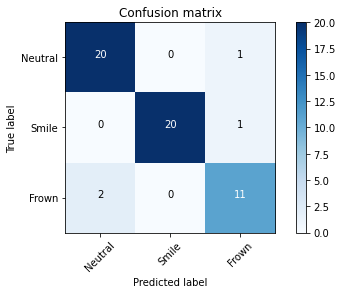

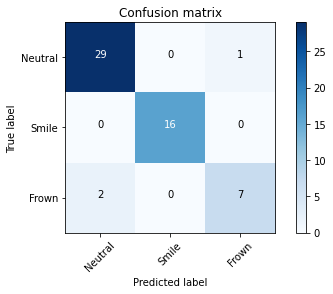

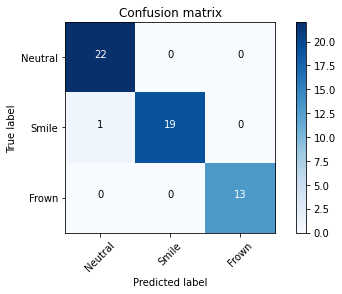

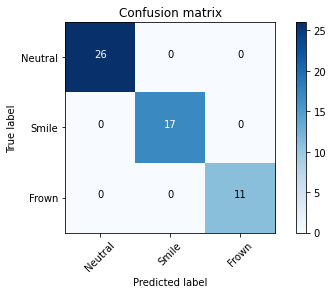

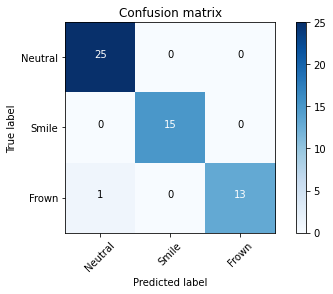

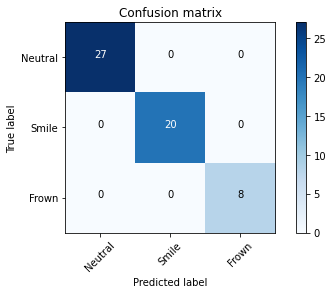

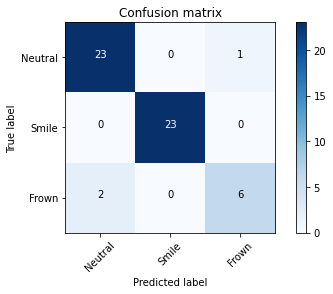

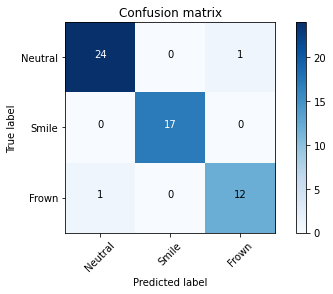

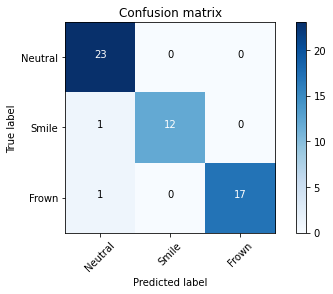

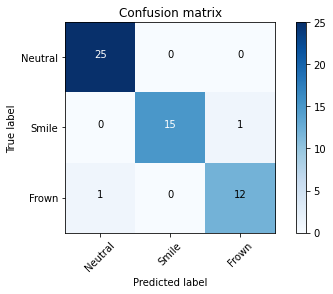

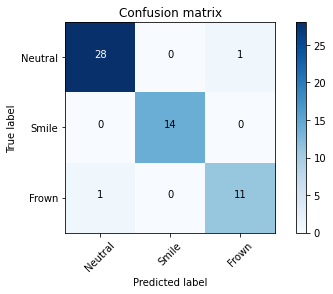

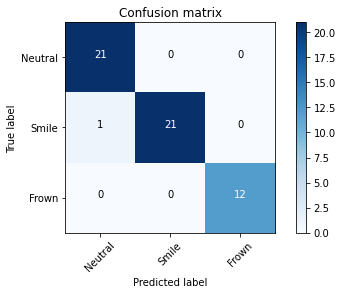

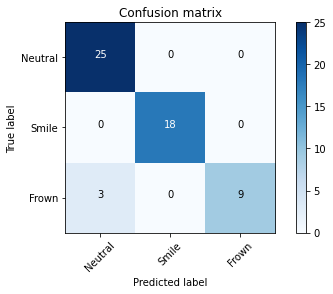

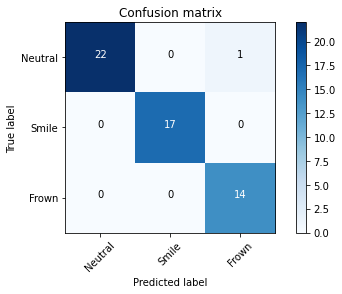

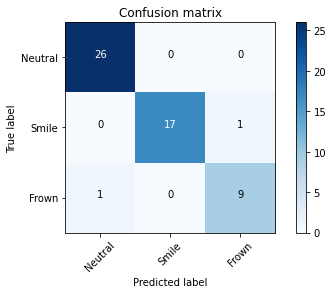

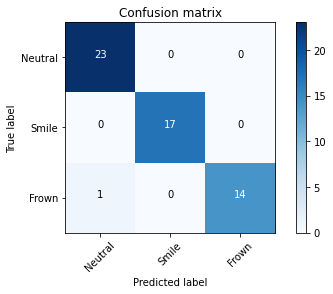

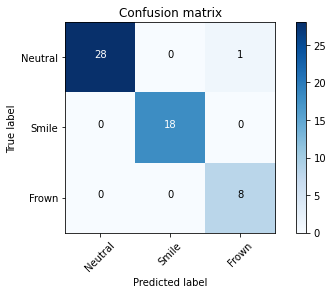

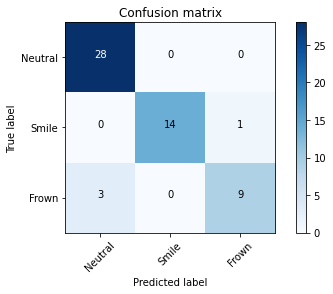

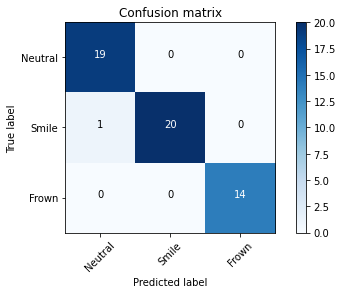

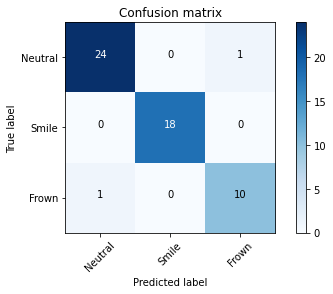

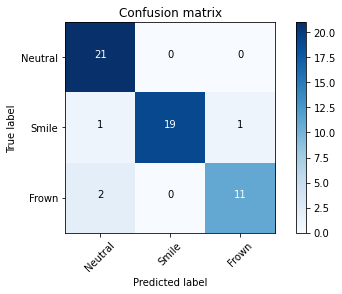

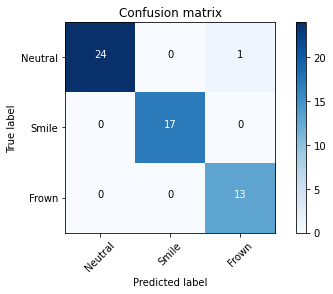

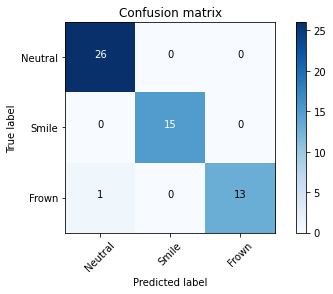

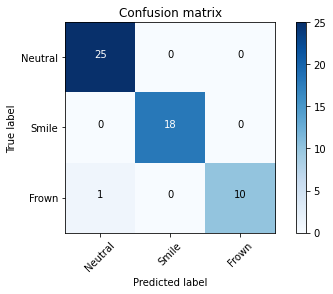

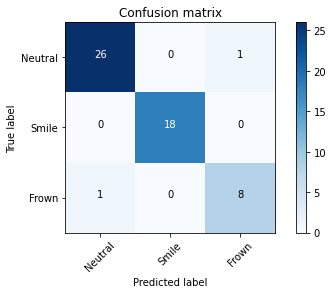

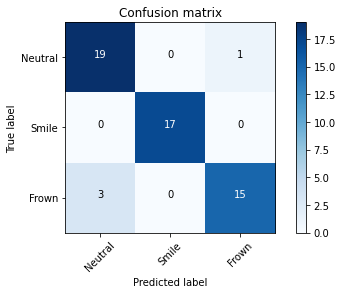

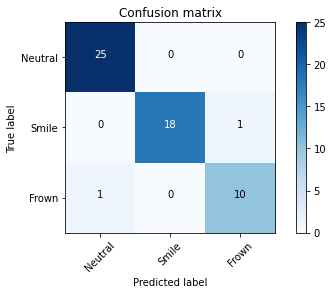

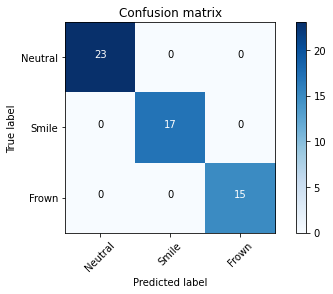

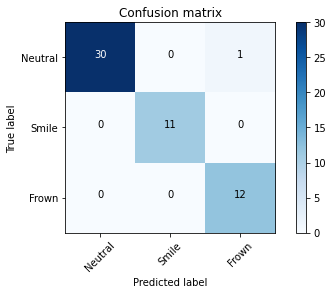

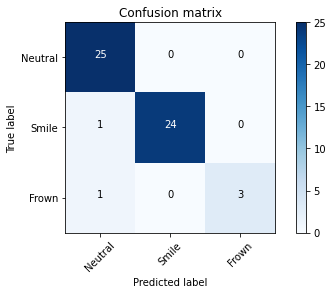

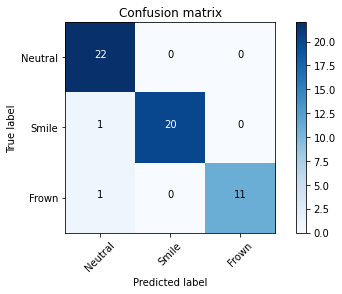

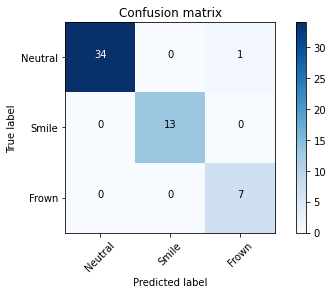

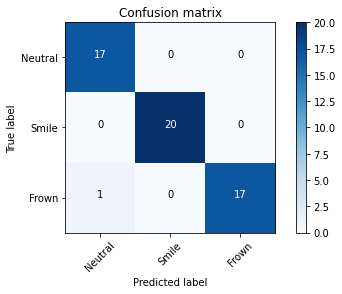

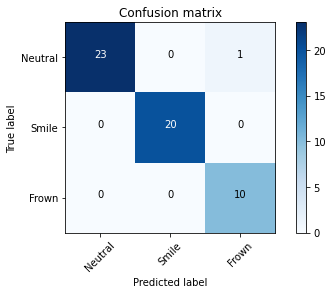

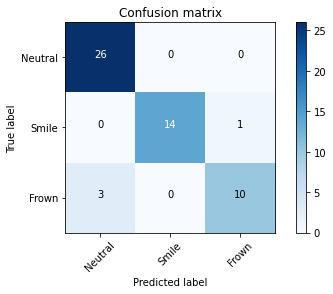

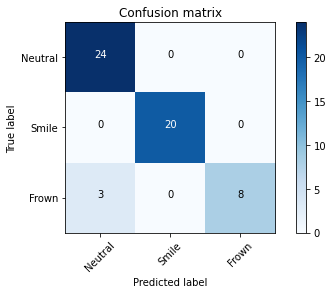

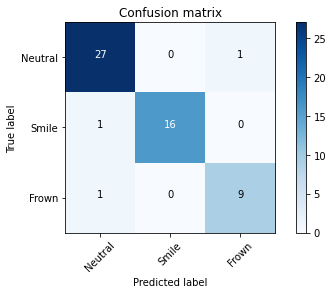

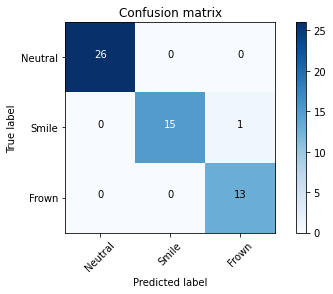

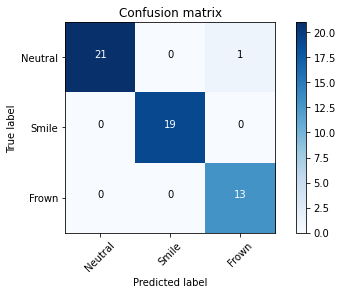

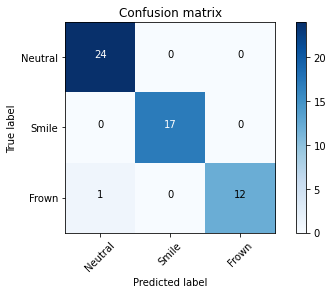

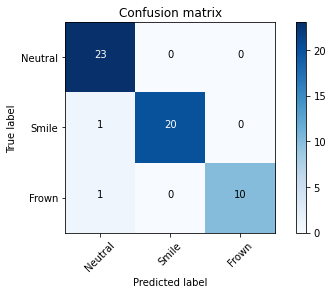

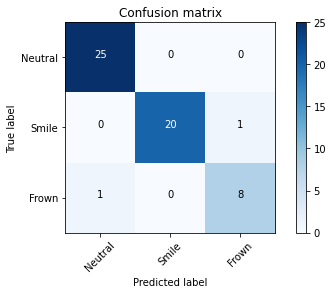

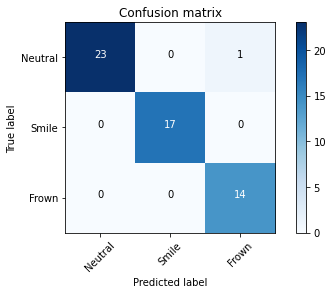

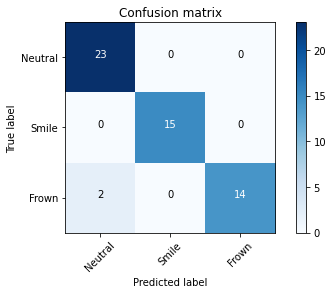

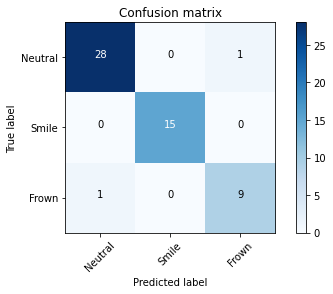

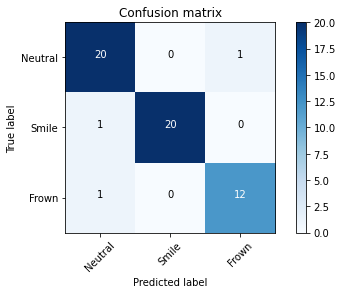

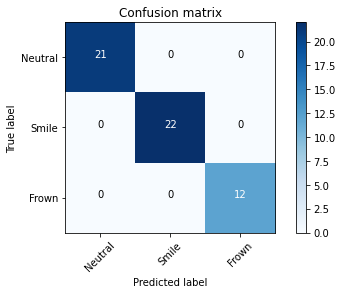

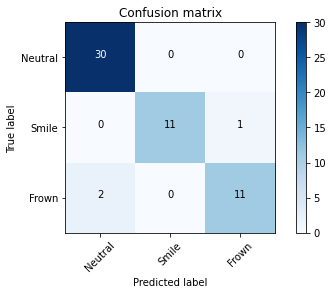

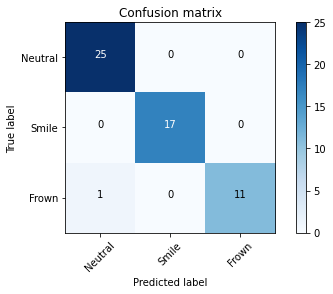

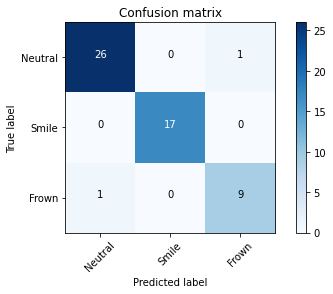

In [27]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

    for algo, model in test.items():
        
        yhat = model.predict(X_test)
        print(algo, accuracy_score(y_test, yhat))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2])
        np.set_printoptions(precision=2)

        print (classification_report(y_test, yhat))

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['Neutral','Smile', 'Frown'],normalize= False,  title='Confusion matrix')


In [28]:
import pickle
with open('as_is.pkl', 'wb') as f:
    pickle.dump(test['gb'], f)

In [29]:
with open('as_is.pkl', 'rb') as f:
    model = pickle.load(f)

In [30]:
import cv2
import mediapipe
import numpy as np
import csv
cap = cv2.VideoCapture(0)

# facemesh

faceModule = mediapipe.solutions.face_mesh
mp_drawing = mediapipe.solutions.drawing_utils # Drawing helpers

circleDrawingSpec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1, color=(0,255,0))
lineDrawingSpec = mp_drawing.DrawingSpec(thickness=1, color=(0,255,0))
 
with faceModule.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = face.process(image)
        #print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        if results.multi_face_landmarks != None:
            for faceLandmarks in results.multi_face_landmarks:
                point_values = []

                for i in range(0, 468):
                    pt1 = faceLandmarks.landmark[i]

                    point_values.append(pt1.x)
                    point_values.append(pt1.y)
                    point_values.append(pt1.z)
                
                
                 # Make Detections
                X = pd.DataFrame([point_values])
                body_language_class = model.predict(X)[0]
                print(body_language_class)
                
                mp_drawing.draw_landmarks(image, faceLandmarks, faceModule.FACEMESH_CONTOURS, circleDrawingSpec, lineDrawingSpec)
 

                # Display Class
                cv2.putText(image, 'CLASS'
                            , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
                cv2.putText(image, str(body_language_class)
                            , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
2
2
1
1
2
1
2
2
2
2
2
2
1
1
2
1
2
2
2
2
2
2
1
1
1
2
2
2
2
2
1
1
1
1
1
1
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
1
1
1
1
1
2
2
2
2
2
1
1
1
2
2
2
2
1
2
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
1
2
2
2
2
2
2
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
1
1
1
0
0
0
0
0
0
0
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1


KeyboardInterrupt: 